In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from scipy.stats import randint
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from scipy.stats import norm
from sklearn.pipeline import Pipeline

import statistics
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [176]:
df = pd.read_csv('USA_construction_cost_of _healthcare_project.csv')

In [177]:
df2 = pd.read_csv('Total Production in Building and Construction Sector.csv')

In [178]:
df

,County,Data Generation Date,OSHPD Project Status,Total Costs of OSHPD Projects,Number of OSHPD Projects,Collection of Counties
0,01 - Alameda,9/30/2013,In Review,$50914315.00,45,Bay Area Counties
1,01 - Alameda,9/30/2013,Pending Construction,$840182510.04,126,Bay Area Counties
2,01 - Alameda,9/30/2013,In Construction,$994352932.29,181,Bay Area Counties
3,01 - Alameda,9/30/2013,In Closure,$65255928.88,81,Bay Area Counties
4,07 - Contra Costa,9/30/2013,In Review,$19067925.00,28,Bay Area Counties
...,...,...,...,...,...,...
4539,56 - Ventura,6/16/2016,In Closure,$18210257.00,11,Greater Los Angeles Counties
4540,57 - Yolo,6/16/2016,In Review,$4405500.00,6,Greater Sacramento Counties
4541,57 - Yolo,6/16/2016,Pending Construction,$680700.00,7,Greater Sacramento Counties
4542,57 - Yolo,6/16/2016,In Construction,$6919172.00,14,Greater Sacramento Counties


# Exploratory  Data Analysis

# Dataset 1

In [179]:
df.shape

(4544, 6)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4544 entries, 0 to 4543
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   County                         4544 non-null   object
 1   Data Generation Date           4544 non-null   object
 2   OSHPD Project Status           4544 non-null   object
 3   Total Costs of OSHPD Projects  4544 non-null   object
 4   Number of OSHPD Projects       4544 non-null   int64 
 5   Collection of Counties         4544 non-null   object
dtypes: int64(1), object(5)
memory usage: 213.1+ KB


In [181]:
# we don't have null values on first dataset
df.isna().sum()

County                           0
Data Generation Date             0
OSHPD Project Status             0
Total Costs of OSHPD Projects    0
Number of OSHPD Projects         0
Collection of Counties           0
dtype: int64

In [182]:
# rename the columns
df.rename(columns = {'County': 'county', 'Data Generation Date': 'year','OSHPD Project Status': 'project_status', 'Total Costs of OSHPD Projects': 'cost','Number of OSHPD Projects': 'no_project','Collection of Counties':'Coll_of_counties'}, inplace= True)

In [183]:
# make sequence for columns
columns = ['year','county','no_project','project_status','Coll_of_counties','cost']

In [184]:
# change the sequence of the features
df= df[columns]

In [185]:
# i just need the year from the data column so i just extracted the year from it
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.strftime('%Y')

In [186]:
# collection of counties column are not usefull and have no insights for my assessment so i drop this column
df.drop('Coll_of_counties',axis=1,inplace=True)

In [187]:
df

,year,county,no_project,project_status,cost
0,2013,01 - Alameda,45,In Review,$50914315.00
1,2013,01 - Alameda,126,Pending Construction,$840182510.04
2,2013,01 - Alameda,181,In Construction,$994352932.29
3,2013,01 - Alameda,81,In Closure,$65255928.88
4,2013,07 - Contra Costa,28,In Review,$19067925.00
...,...,...,...,...,...
4539,2016,56 - Ventura,11,In Closure,$18210257.00
4540,2016,57 - Yolo,6,In Review,$4405500.00
4541,2016,57 - Yolo,7,Pending Construction,$680700.00
4542,2016,57 - Yolo,14,In Construction,$6919172.00


In [188]:
# count unique values from all features
print(df.nunique())

# show all unique values from all features
for i in df.columns:
    print(i)
    print(df[i].unique())

year                 4
county              16
no_project         405
project_status       4
cost              3675
dtype: int64
year
['2013' '2014' '2015' '2016']
county
['01 - Alameda' '07 - Contra Costa' '09 - El Dorado' '19 - Los Angeles'
 '21 - Marin' '28 - Napa' '30 - Orange' '31 - Placer' '34 - Sacramento'
 '38 - San Francisco' '41 - San Mateo' '43 - Santa Clara' '48 - Solano'
 '49 - Sonoma' '56 - Ventura' '57 - Yolo']
no_project
[ 45 126 181  81  28  43  56  20   6   2   5   4 439 564 868 629  17   9
  21  18   3   8  15  22  99 120 132 189   7  16  36 119  64  67 139 102
  30  72  38  71 168 140  13  11  29  14  23  46  19  37  65  51  44 125
  82 434 568 843 655  12  98 121 133 191  63 136 101  32  42  80 165 141
  24  35  53  50 182  79  27  59   1 410 506 855 677 143 199  39 127  62
  61  73 160 130  34  55 123 184  74  57 421 853 693 145 204 100  75 154
 186  26  47 432 498 856 709 147 206  10  40  58  66  25  76  60 151 134
  41  68 187 436 508 848 732  85 211 118 150 124 

In [189]:
df.dtypes

year              object
county            object
no_project         int64
project_status    object
cost              object
dtype: object

Changing the datatype of columns

In [190]:
# Remove unusual characters from county column
c = df['county'].copy()
c = c.astype(str)
c = c.str[4:]
df['county'] = c

In [191]:
# remove $ sign from cost columm and convert its datatype to float
u = df['cost'].copy()
u = u.astype(str)
u = u.str[1:]
df['cost'] = pd.to_numeric(u, errors='coerce').astype(float)

In [192]:
print(df['cost'][5])

19570172.0


In [193]:
df['year'] = df['year'].astype(int)

In [194]:
df.dtypes

year                int32
county             object
no_project          int64
project_status     object
cost              float64
dtype: object

# Dataset 2

In [195]:
df2

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02402V02895,Type of Building and Construction,UNIT,VALUE
0,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,-,All building and construction,Base 2015=100,143.514977
1,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,11,Building (excluding civil engineering),Base 2015=100,182.795802
2,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,111,Residential building,Base 2015=100,279.281551
3,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,112,Non-residential building,Base 2015=100,115.359508
4,BEQ04C01,Value of Production Index in Building and Cons...,20001,2000Q1,12,Civil engineering,Base 2015=100,60.438887
...,...,...,...,...,...,...,...,...
1835,BEQ04C04,Volume of Production Index in Building and Con...,20224,2022Q4,-,All building and construction,Base 2015=100,125.102539
1836,BEQ04C04,Volume of Production Index in Building and Con...,20224,2022Q4,11,Building (excluding civil engineering),Base 2015=100,126.742285
1837,BEQ04C04,Volume of Production Index in Building and Con...,20224,2022Q4,111,Residential building,Base 2015=100,108.239693
1838,BEQ04C04,Volume of Production Index in Building and Con...,20224,2022Q4,112,Non-residential building,Base 2015=100,130.098153


In [196]:
# X = df2.drop(['VALUE'], axis=1)
# y = df2['VALUE']

In [197]:
# plt.figure(figsize=(12,10))
# cor = X.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [198]:
# drop unusual columns
df2.drop(['Quarter','C02402V02895','UNIT'], axis=1,inplace=True)

In [199]:
df2.rename(columns = {'STATISTIC':'statistic','TLIST(Q1)':'year','Statistic Label':'stats_label','VALUE':'price','Type of Building and Construction':'construction_type'},inplace = True)

In [200]:
uni_values = df2['stats_label'].unique()

In [201]:
df2['stats_label'].replace(to_replace=uni_values,
value= ['production_value','production_volume','seasonally_prod_value','seasonally_prod_volume'],
inplace=True)

In [202]:
x = df2['year'].astype(str)
x = x.str[:4]
df2['year'] = x.astype(int)

In [203]:
df2

,statistic,stats_label,year,construction_type,price
0,BEQ04C01,production_value,2000,All building and construction,143.514977
1,BEQ04C01,production_value,2000,Building (excluding civil engineering),182.795802
2,BEQ04C01,production_value,2000,Residential building,279.281551
3,BEQ04C01,production_value,2000,Non-residential building,115.359508
4,BEQ04C01,production_value,2000,Civil engineering,60.438887
...,...,...,...,...,...
1835,BEQ04C04,seasonally_prod_volume,2022,All building and construction,125.102539
1836,BEQ04C04,seasonally_prod_volume,2022,Building (excluding civil engineering),126.742285
1837,BEQ04C04,seasonally_prod_volume,2022,Residential building,108.239693
1838,BEQ04C04,seasonally_prod_volume,2022,Non-residential building,130.098153


# Perform visualization on dataset

<Axes: xlabel='price', ylabel='Count'>

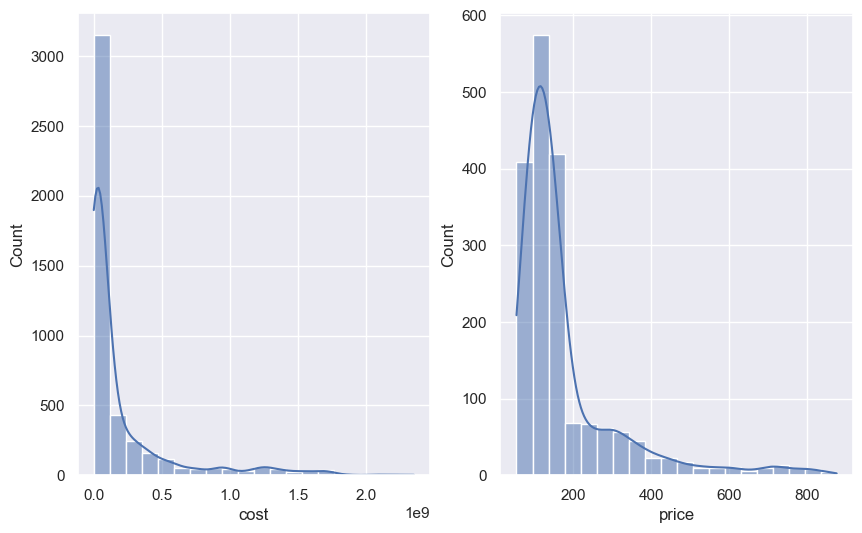

In [204]:
# In this histogram plot you can clearly see that it is the LOGNormal distribution 
fig, axes = plt.subplots(1, 2,figsize=(10, 6))
sns.histplot(df['cost'],bins=20, kde=True, ax=axes[0])
sns.histplot(df2['price'],bins=20, kde=True, ax=axes[1])

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



<Axes: xlabel='price', ylabel='Count'>

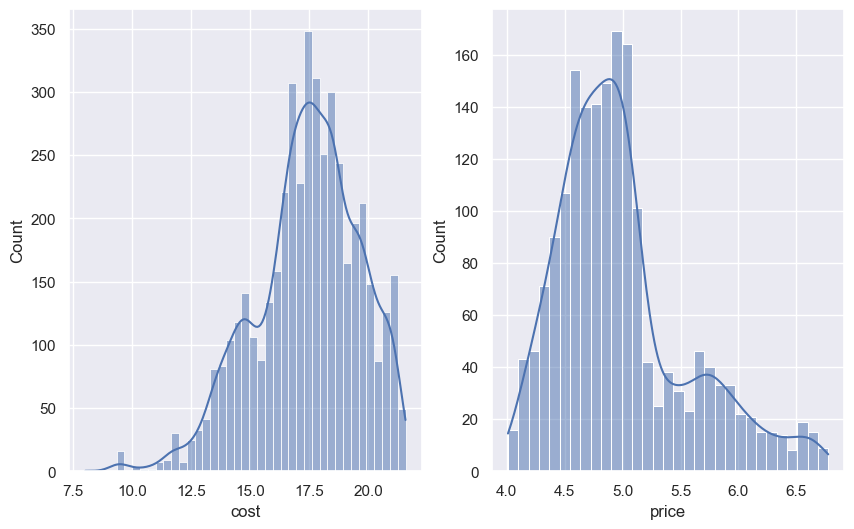

In [205]:
# NOw you see the distribution of price column is similar to the normal distribution becasue taking the log of the LOGnormal
# distribution convert it into normal distribution
fig, axes = plt.subplots(1, 2,figsize=(10, 6))
sns.histplot(np.log(df['cost']), kde=True, ax=axes[0])
sns.histplot(np.log(df2['price']), kde=True, ax=axes[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Alameda'),
  Text(1, 0, ' Contra Costa'),
  Text(2, 0, ' El Dorado'),
  Text(3, 0, ' Los Angeles'),
  Text(4, 0, ' Marin'),
  Text(5, 0, ' Napa'),
  Text(6, 0, ' Orange'),
  Text(7, 0, ' Placer'),
  Text(8, 0, ' Sacramento'),
  Text(9, 0, ' San Francisco'),
  Text(10, 0, ' San Mateo'),
  Text(11, 0, ' Santa Clara'),
  Text(12, 0, ' Solano'),
  Text(13, 0, ' Sonoma'),
  Text(14, 0, ' Ventura'),
  Text(15, 0, ' Yolo')])

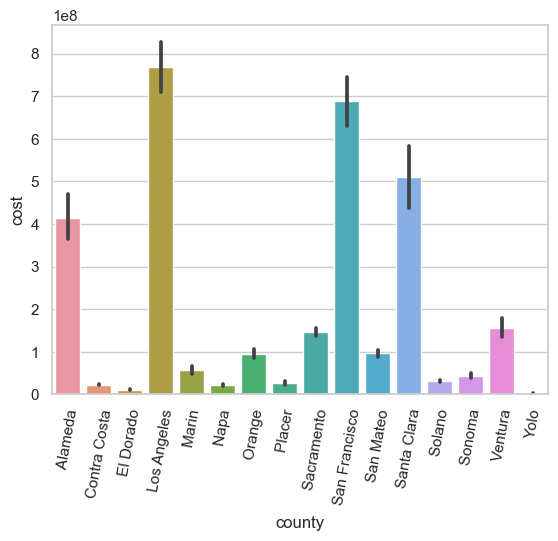

In [206]:
# This is the barplot of cost column with respect to counties

sns.set(style="whitegrid")
sns.barplot(x="county", y="cost", data=df)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'All building and construction'),
  Text(1, 0, 'Building (excluding civil engineering)'),
  Text(2, 0, 'Residential building'),
  Text(3, 0, 'Non-residential building'),
  Text(4, 0, 'Civil engineering')])

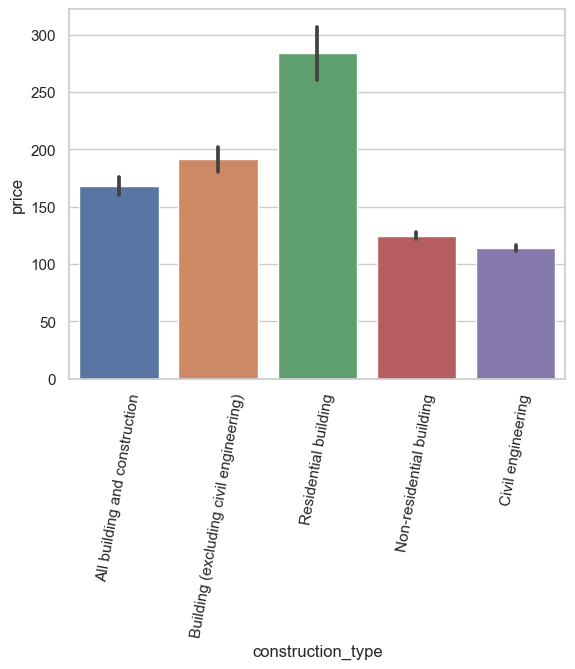

In [207]:
sns.set(style="whitegrid")
sns.barplot(x="construction_type", y="price", data=df2)
plt.xticks(rotation=80)

In [208]:
# In this boxxplot graph you can see the detail of all datasset 
figure = px.box(df, x='county', y='cost')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

You see the inflation in the values of the cost column so we are unable to understand the plots 
so now im going to take log of cost column for removing the inflation

In [209]:
log_df = df.copy()
log_df['cost'] = np.log(log_df['cost'])

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

divide by zero encountered in log



In [210]:
# now you see this plot is much better from previous bosplot
figure = px.box(log_df, x='county', y='cost')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

In [211]:
# Bocplot for the second dataframe
figure = px.box(df2, x='construction_type', y='price')
figure.update_layout(template='gridon',title='COnstruction cost respect by county',xaxis_title='County',yaxis_title='Cost (Euro)',
                     xaxis_showgrid=True,yaxis_showgrid=True)
figure.show()

In [212]:
df

,year,county,no_project,project_status,cost
0,2013,Alameda,45,In Review,5.091432e+07
1,2013,Alameda,126,Pending Construction,8.401825e+08
2,2013,Alameda,181,In Construction,9.943529e+08
3,2013,Alameda,81,In Closure,6.525593e+07
4,2013,Contra Costa,28,In Review,1.906792e+07
...,...,...,...,...,...
4539,2016,Ventura,11,In Closure,1.821026e+07
4540,2016,Yolo,6,In Review,4.405500e+06
4541,2016,Yolo,7,Pending Construction,6.807000e+05
4542,2016,Yolo,14,In Construction,6.919172e+06


In [213]:
total_by_year = {}
a=[]
b=[]
for i in df['year'].unique():
    filt =(df['year'] == i )
    x = df['no_project'][filt].sum()
    print(i," = ",x)
#     a.append(i)
#     b.append(x)
    total_by_year.update({i:x})  
# total_by_year.update({'year':a,'total':b})    

2013  =  37615
2014  =  134370
2015  =  143245
2016  =  56304


In [214]:
t_proj_by_year = pd.DataFrame(total_by_year,index=[1])

In [215]:
t_proj_by_year

,2013,2014,2015,2016
1,37615,134370,143245,56304


<Axes: >

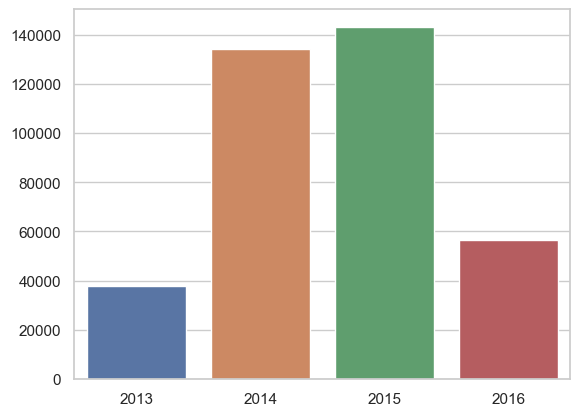

In [216]:
# This plot shows how many projects are done in USA by year, it shows that USA do 37615 construction project in 2013... etc
sns.barplot(data=t_proj_by_year)

In [217]:
df

,year,county,no_project,project_status,cost
0,2013,Alameda,45,In Review,5.091432e+07
1,2013,Alameda,126,Pending Construction,8.401825e+08
2,2013,Alameda,181,In Construction,9.943529e+08
3,2013,Alameda,81,In Closure,6.525593e+07
4,2013,Contra Costa,28,In Review,1.906792e+07
...,...,...,...,...,...
4539,2016,Ventura,11,In Closure,1.821026e+07
4540,2016,Yolo,6,In Review,4.405500e+06
4541,2016,Yolo,7,Pending Construction,6.807000e+05
4542,2016,Yolo,14,In Construction,6.919172e+06


In [218]:
type_proj = {}
for c in df['county'].unique():
    filt = (df['county'] == c)
    x = df['no_project'][filt].sum()
    print(c," = ",x)
    type_proj.update({c:x})

 Alameda  =  29170
 Contra Costa  =  10847
 El Dorado  =  1570
 Los Angeles  =  175576
 Marin  =  4808
 Napa  =  3853
 Orange  =  35986
 Placer  =  5071
 Sacramento  =  20774
 San Francisco  =  20832
 San Mateo  =  9268
 Santa Clara  =  24141
 Solano  =  5224
 Sonoma  =  8096
 Ventura  =  14436
 Yolo  =  1882


In [219]:
type_proj = pd.DataFrame(type_proj , index=[1])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Alameda'),
  Text(1, 0, ' Contra Costa'),
  Text(2, 0, ' El Dorado'),
  Text(3, 0, ' Los Angeles'),
  Text(4, 0, ' Marin'),
  Text(5, 0, ' Napa'),
  Text(6, 0, ' Orange'),
  Text(7, 0, ' Placer'),
  Text(8, 0, ' Sacramento'),
  Text(9, 0, ' San Francisco'),
  Text(10, 0, ' San Mateo'),
  Text(11, 0, ' Santa Clara'),
  Text(12, 0, ' Solano'),
  Text(13, 0, ' Sonoma'),
  Text(14, 0, ' Ventura'),
  Text(15, 0, ' Yolo')])

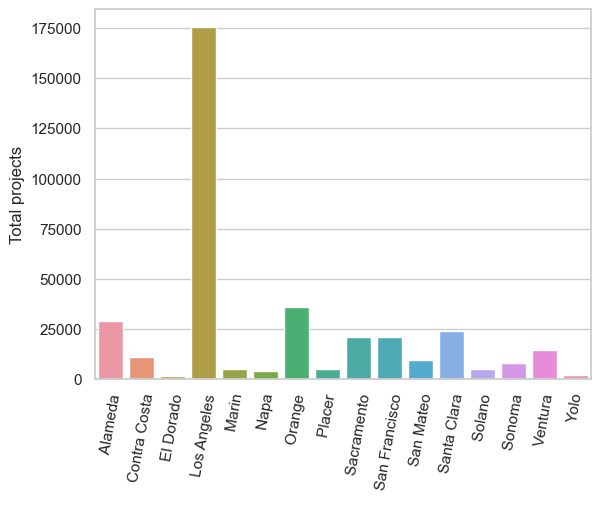

In [220]:
# This graph shows that how many number of projects are done by cities and you can clearly see that in Los Angeles more projects
# done byt the government of USA

sns.barplot(type_proj)
plt.ylabel('Total projects')
plt.xticks(rotation=80)

In [221]:
df

,year,county,no_project,project_status,cost
0,2013,Alameda,45,In Review,5.091432e+07
1,2013,Alameda,126,Pending Construction,8.401825e+08
2,2013,Alameda,181,In Construction,9.943529e+08
3,2013,Alameda,81,In Closure,6.525593e+07
4,2013,Contra Costa,28,In Review,1.906792e+07
...,...,...,...,...,...
4539,2016,Ventura,11,In Closure,1.821026e+07
4540,2016,Yolo,6,In Review,4.405500e+06
4541,2016,Yolo,7,Pending Construction,6.807000e+05
4542,2016,Yolo,14,In Construction,6.919172e+06


In [269]:
# counties = df.groupby(['county'])
# alameda = counties.get_group(' Alameda')
# Contra = counties.get_group(' Contra Costa')
# Dorado = counties.get_group(' El Dorado')
# Angeles = counties.get_group(' Los Angeles')
# Marin = counties.get_group(' Marin')
# Napa = counties.get_group(' Napa')
# Orange = counties.get_group(' Orange')
# Placer = counties.get_group(' Placer')
# Sacramento = counties.get_group(' Sacramento')
# Francisco = counties.get_group(' San Francisco')
# Mateo = counties.get_group(' San Mateo')
# Santa = counties.get_group(' Santa Clara')
# Solano = counties.get_group(' Solano')
# Sonoma = counties.get_group(' Sonoma')
# Ventura = counties.get_group(' Ventura')
# Yolo = counties.get_group(' Yolo')

# Hypothesis Testing

# One sample T-test

Lets do One_sample test on cost column of dataset.
Lets find out that the mean of population is different or same as the sample mean.

H0 (Null Hypothesis) = population mean is not different from sample mean
H1 (Alternate hypothesis) =  population mean is different from sample mean

In [49]:
# population mean
cost_mean = df['cost'].mean()
cost_mean

193292266.7294608

In [50]:
sample_size=1000
cost_sample=np.random.choice(df['cost'],sample_size)

In [51]:
# sample mean
cost_sample_mean = cost_sample.mean()

In [52]:
ttest,p_value=ttest_1samp(cost_sample,193292266.7294608)
print(p_value)

0.8840607121599884


In [53]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


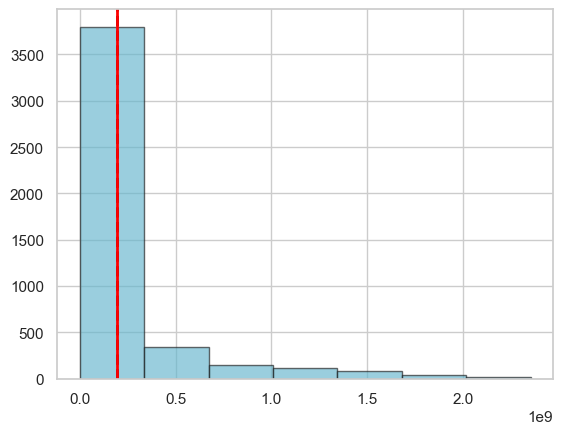

In [54]:
result = plt.hist(df['cost'], bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(cost_sample_mean, color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(cost_mean, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

I'm trying to do one sample testing on different dataset

In [55]:
df2.shape

(1840, 5)

In [56]:
price_mu = df2['price'].mean()
price_mu

176.63252246174923

In [57]:
s_size=500
price_sample=np.random.choice(df2['price'],s_size)

In [58]:
price_s_mu = price_sample.mean()

In [59]:
ttest,p_value=ttest_1samp(price_sample,176.63252246174923)
print(p_value)

0.876484595644093


In [60]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


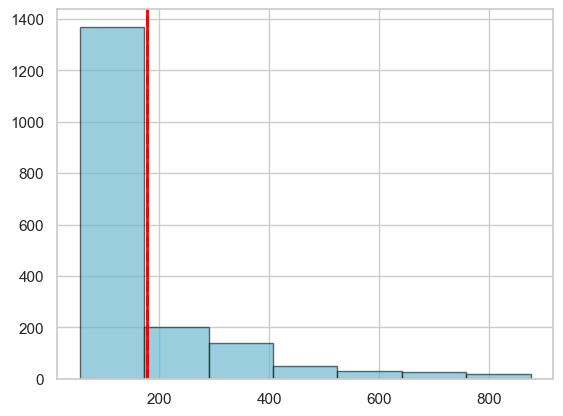

In [61]:
result = plt.hist(df2['price'], bins=7, color='c', edgecolor='k', alpha=0.65)
plt.axvline(price_s_mu, color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(price_mu, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

# Two sample t-test

In [62]:
dfx = df[(df.project_status=='In Review')]
dfy = df[(df.project_status=='In Construction')]

In [63]:
_,p_value = stats.ttest_ind(a=dfx['cost'], b=dfy['cost'])

In [64]:
# Perform the two-sample t-test with equal variances:
stats.ttest_ind(a=dfx['cost'], b=dfy['cost'])

Ttest_indResult(statistic=-13.093885170610697, pvalue=8.076625404468019e-38)

In [65]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print("we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are rejecting null hypothesis


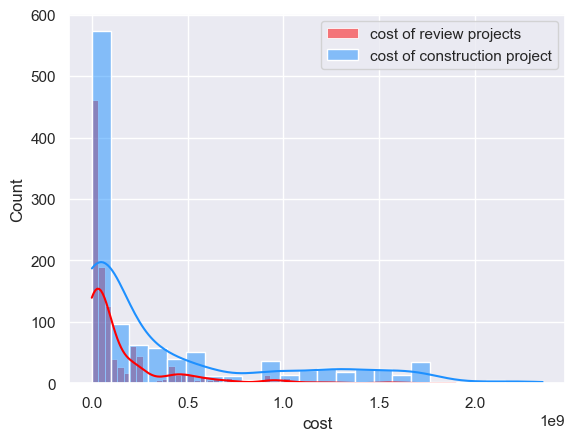

In [66]:
sns.set(style="darkgrid")
sns.histplot(data=dfx, x="cost", color="red", label="cost of review projects", kde=True)
sns.histplot(data=dfy, x="cost", color="dodgerblue", label="cost of construction project", kde=True)
plt.legend() 
plt.show()

In [67]:
df

,year,county,no_project,project_status,cost
0,2013,Alameda,45,In Review,5.091432e+07
1,2013,Alameda,126,Pending Construction,8.401825e+08
2,2013,Alameda,181,In Construction,9.943529e+08
3,2013,Alameda,81,In Closure,6.525593e+07
4,2013,Contra Costa,28,In Review,1.906792e+07
...,...,...,...,...,...
4539,2016,Ventura,11,In Closure,1.821026e+07
4540,2016,Yolo,6,In Review,4.405500e+06
4541,2016,Yolo,7,Pending Construction,6.807000e+05
4542,2016,Yolo,14,In Construction,6.919172e+06


# Two sample KS-test

In [68]:
grp1 = df[(df.project_status == 'In Review')]
grp2 = df[(df.project_status == 'In Construction')]

In [69]:
_,p_value = stats.ks_2samp(grp1.no_project, grp2.no_project)

In [70]:
stats.ks_2samp(grp1.no_project, grp2.no_project)

KstestResult(statistic=0.32130281690140844, pvalue=3.0054382294065935e-52, statistic_location=93, statistic_sign=1)

In [71]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


We conclude that the two samples of no_project do not come from the same population. We have sufficient evidence to reject $H_0$ 

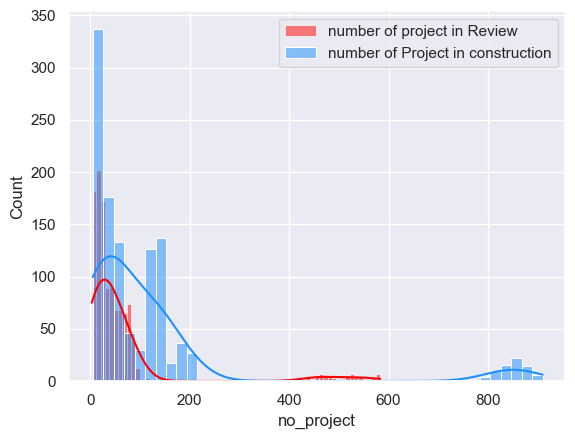

In [72]:
sns.set(style="darkgrid")
sns.histplot(data=grp1, x="no_project", color="red", label="number of project in Review", kde=True)
sns.histplot(data=grp2, x="no_project", color="dodgerblue", label="number of Project in construction", kde=True)
plt.legend() 
plt.show()

# Two pair test

In [73]:
cost_second_sample = np.random.choice(df['cost'],sample_size)

In [74]:
difference = pd.DataFrame({
    'cost_Sample': cost_sample,
    'second_cost_sample': cost_second_sample,
    'difference' : cost_sample - cost_second_sample
})

In [75]:
difference

,cost_Sample,second_cost_sample,difference
0,6.199515e+06,3.142485e+06,3.057030e+06
1,9.548920e+05,4.296872e+06,-3.341980e+06
2,8.113709e+07,9.189961e+08,-8.378590e+08
3,9.554979e+07,8.894746e+07,6.602330e+06
4,8.452777e+06,2.793456e+07,-1.948178e+07
...,...,...,...
995,3.527470e+07,2.978594e+08,-2.625847e+08
996,1.035000e+06,8.394519e+06,-7.359519e+06
997,1.634566e+08,1.343870e+08,2.906958e+07
998,9.548920e+05,1.177354e+07,-1.081865e+07


In [76]:
_,p_value=stats.ttest_rel(a=cost_sample, b=cost_second_sample)

In [77]:
p_value

0.6047146498636818

In [78]:
# it says that there is a maximum difference in the two particular groups
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


Apply on second dataset

In [79]:
df2.head()

,statistic,stats_label,year,construction_type,price
0,BEQ04C01,production_value,2000,All building and construction,143.514977
1,BEQ04C01,production_value,2000,Building (excluding civil engineering),182.795802
2,BEQ04C01,production_value,2000,Residential building,279.281551
3,BEQ04C01,production_value,2000,Non-residential building,115.359508
4,BEQ04C01,production_value,2000,Civil engineering,60.438887


In [80]:
value_2_sample = np.random.choice(df2['price'],s_size)

In [81]:
diff_ire = pd.DataFrame({
    'cost_Sample': price_sample,
    'second_cost_sample': value_2_sample,
    'difference' : price_sample - value_2_sample
})

In [82]:
diff_ire

,cost_Sample,second_cost_sample,difference
0,70.877533,88.661006,-17.783473
1,376.464446,292.509839,83.954607
2,784.829032,94.609820,690.219213
3,140.313949,114.257330,26.056619
4,115.470077,290.889480,-175.419403
...,...,...,...
495,106.337643,120.552608,-14.214965
496,170.002847,77.458775,92.544072
497,162.722508,99.967953,62.754555
498,303.290373,94.668029,208.622345


In [83]:
_,p_value=stats.ttest_rel(a=price_sample, b=value_2_sample)

In [84]:
p_value

0.4387901512402357

In [85]:
# it says that there is a maximum difference in the two particular groups
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")
    

we are accepting null hypothesis


# Chi-square test

In [86]:
chi = pd.crosstab(df['county'], df['no_project'])

In [87]:
observed_values = chi.values

In [88]:
val = stats.chi2_contingency(chi)

In [89]:
val

Chi2ContingencyResult(statistic=17434.853569147566, pvalue=0.0, dof=6060, expected_freq=array([[0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       ...,
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625]]))

In [90]:
expected_values = val[3]

In [91]:
expected_values

array([[0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       ...,
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625],
       [0.3125, 1.1875, 4.75  , ..., 0.0625, 0.0625, 0.0625]])

In [92]:
no_of_rows=len(chi.iloc[0:2,0])
no_of_columns=len(chi.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [93]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [94]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 321.6


In [95]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)
     

critical_value: 3.841458820694124


In [96]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [97]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# ANOVA test

In [98]:
dfx = df[(df.project_status=='In Review')]
dfy = df[(df.project_status=='In Construction')]
dfz = df[(df.project_status=='In Closure')]
# Perform the one-way ANOVA test:
_,p_test = stats.f_oneway(dfx['no_project'], dfy['no_project'], dfz['no_project'])

In [99]:
stats.f_oneway(dfx['no_project'], dfy['no_project'], dfz['no_project'])

F_onewayResult(statistic=36.085250503228096, pvalue=3.1056196233023916e-16)

In [100]:
p_test

3.1056196233023916e-16

In [101]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


A plot to see why we have rejected  𝐻0

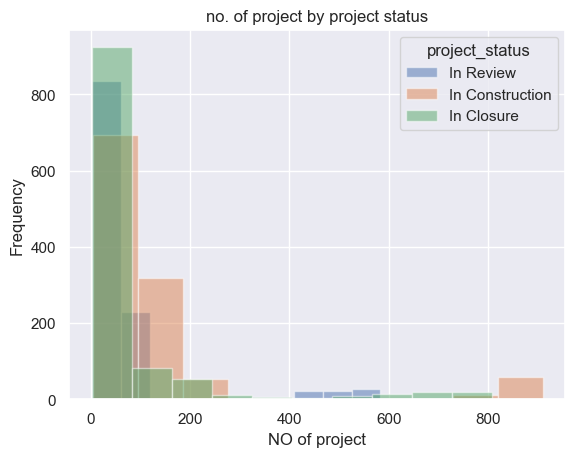

In [102]:
plt.hist(dfx['no_project'], alpha=0.5, label='In Review')
plt.hist(dfy['no_project'], alpha=0.5, label='In Construction')
plt.hist(dfz['no_project'], alpha=0.5, label='In Closure')

# Add plot title and axis labels
plt.title('no. of project by project status')
plt.xlabel('NO of project')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='project_status')

# Display plot
plt.show()

If we reject $H_0$ using an ANOVA test, Now we have to find out which means are differ so let find it out

 we can perform a Tukey-Kramer analysis to see which of the means differ from each other.

In [103]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [104]:
tukey = pairwise_tukeyhsd(endog=df['no_project'],
                          groups=df['project_status'],
                          alpha=0.05)

#display results
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1            group2        meandiff p-adj   lower    upper   reject
-----------------------------------------------------------------------------
     In Closure      In Construction  40.2967    0.0  24.1993   56.394   True
     In Closure            In Review -14.1813 0.1067 -30.2787    1.916  False
     In Closure Pending Construction -15.9305 0.0536 -32.0278   0.1669  False
In Construction            In Review  -54.478    0.0 -70.5754 -38.3806   True
In Construction Pending Construction -56.2271    0.0 -72.3245 -40.1297   True
      In Review Pending Construction  -1.7491 0.9924 -17.8465  14.3483  False
-----------------------------------------------------------------------------


# Model building and Evaluation

In [140]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.feature_selection import RFE

In [106]:
X = df.drop(['cost'], axis=1)
y = df['cost']

In [107]:
# plt.figure(figsize=(12,10))
# cor = X.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
# plt.show()

In [108]:
cat_col = X.select_dtypes(include=[object]).columns
cat_col

Index(['county', 'project_status'], dtype='object')

# one-hot encoding

In [109]:
x_dummies = pd.get_dummies(X[cat_col], prefix = ['county','project_status'])

In [110]:
x_dummies.shape

(4544, 20)

In [111]:
X.drop(['county','project_status'], axis=1, inplace =True)

In [112]:
X = pd.concat([X,x_dummies] ,axis=1)

Apply standardscalar on trainig set 

In [113]:
sc = StandardScaler()

In [114]:
x_scalar = sc.fit_transform(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(x_scalar, y, test_size=0.20, random_state =5)

In [116]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3635, 22), (3635,), (909, 22), (909,))

In [117]:
features = X

# Random Forest regressor

In [118]:
rf = RandomForestRegressor(criterion='absolute_error')

estimator =  5
Training accuracy = 0.9895938638382556
Testing accuracy = 0.9518671375159646
Accuracy After cross_validation:  0.9558436823016623
estimator =  10
Training accuracy = 0.9912459570935616
Testing accuracy = 0.9565460966175874
Accuracy After cross_validation:  0.9580130076845123
estimator =  15
Training accuracy = 0.9915431423443045
Testing accuracy = 0.953488562794964
Accuracy After cross_validation:  0.9576565978737219
estimator =  20
Training accuracy = 0.9921451135227515
Testing accuracy = 0.9573619714343511
Accuracy After cross_validation:  0.9604237621588106
estimator =  25
Training accuracy = 0.9921396184356455
Testing accuracy = 0.9559632630238555
Accuracy After cross_validation:  0.9616450113987177
estimator =  30
Training accuracy = 0.991317677159612
Testing accuracy = 0.9579920294009894
Accuracy After cross_validation:  0.9607459061036074
estimator =  35
Training accuracy = 0.9917860331774039
Testing accuracy = 0.9564602872954293
Accuracy After cross_validation:  

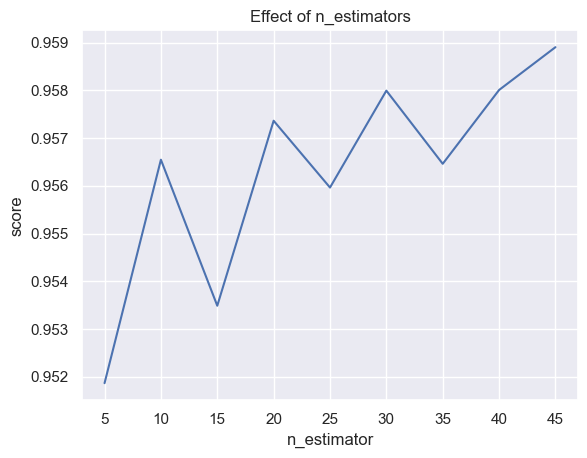

In [119]:
# i set n_estimator/Decision trees between 50 to 200  and checking the difference
estimators = np.arange(5,50, 5)

scores = []
for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    t = rf.score(X_train,y_train)
    s = rf.score(X_test, y_test)
    score = cross_val_score(rf,X_train,y_train,cv = 5)
    print('estimator = ',n)
    print('Training accuracy =',t)
    print('Testing accuracy =',s)
    print("Accuracy After cross_validation: ", score.mean())
    scores.append(s)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [141]:
from sklearn.feature_selection import RFE
rf.fit(X_train, y_train)

rfe = RFE(rf, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)

array([[-0.70583189, -0.39598709, -0.25819889, ..., -0.57735027,
        -0.57735027, -0.57735027],
       [-1.8447879 ,  2.75793464, -0.25819889, ..., -0.57735027,
        -0.57735027,  1.73205081],
       [-0.70583189, -0.42911652, -0.25819889, ..., -0.57735027,
         1.73205081, -0.57735027],
       ...,
       [ 1.57208013, -0.27672115, -0.25819889, ..., -0.57735027,
        -0.57735027, -0.57735027],
       [ 0.43312412,  4.87159227, -0.25819889, ...,  1.73205081,
        -0.57735027, -0.57735027],
       [ 0.43312412, -0.24359172, -0.25819889, ..., -0.57735027,
        -0.57735027, -0.57735027]])

In [145]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('no_project', True, 1),
 ('county_ Alameda', False, 3),
 ('county_ Contra Costa', False, 7),
 ('county_ El Dorado', False, 13),
 ('county_ Los Angeles', False, 10),
 ('county_ Marin', False, 4),
 ('county_ Napa', False, 11),
 ('county_ Orange', True, 1),
 ('county_ Placer', False, 8),
 ('county_ Sacramento', True, 1),
 ('county_ San Francisco', True, 1),
 ('county_ San Mateo', False, 5),
 ('county_ Santa Clara', True, 1),
 ('county_ Solano', False, 9),
 ('county_ Sonoma', False, 6),
 ('county_ Ventura', False, 2),
 ('county_ Yolo', False, 12),
 ('project_status_In Closure', True, 1),
 ('project_status_In Construction', True, 1),
 ('project_status_In Review', True, 1),
 ('project_status_Pending Construction', True, 1)]

# Decision Tree Regressor

Accuracy before cross_validation:  0.9474836398447175
Accuracy After cross_validation:  0.9484657645391646
Mean Square Error:  6056918910754190.0
Mean Absolute Error:  21130004.899262782


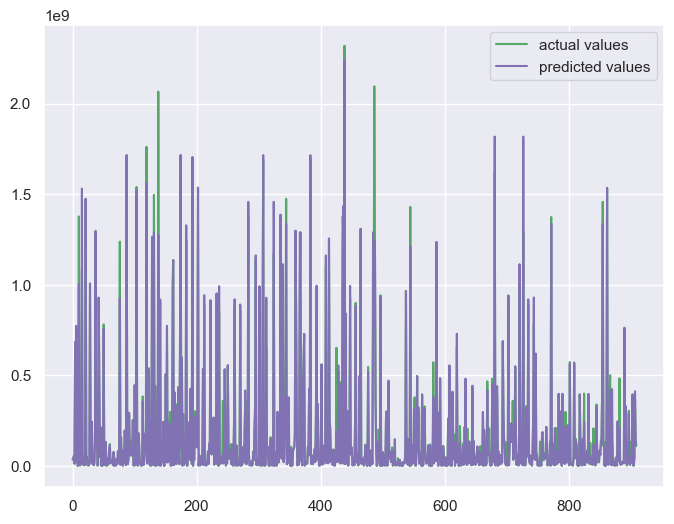

In [120]:
# Decision Tree
dt = DecisionTreeRegressor(criterion='squared_error',splitter = 'random')


dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)


score = cross_val_score(dt,X_train,y_train,cv = 5)

print("Accuracy before cross_validation: ",r2_score(y_test,dt_pred))
print("Accuracy After cross_validation: ", score.mean())
print("Mean Square Error: ", mean_squared_error(y_test,dt_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,dt_pred))


# check difference between actual target values and predicted values by graph
plt.figure(figsize=(8, 6))
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
plt.plot([i for i in range(len(y_test))],dt_pred, c='m',label="predicted values")
plt.legend()
plt.show()

# Random SearchCV

In [121]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = [1,3,5,8,10]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 11,16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 9,12,22]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':["squared_error", "absolute_error", "poisson"]}
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': [1, 3, 5, 8, 10], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'min_samples_split': [2, 4, 11, 16], 'min_samples_leaf': [1, 5, 9, 12, 22], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [122]:
rf2 = RandomForestRegressor()
rf_searchcv=RandomizedSearchCV(estimator=rf2,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_searchcv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200],
                                        'max_features': [1, 3, 5, 8, 10],
                                        'min_samples_leaf': [1, 5, 9, 12, 22],
                                        'min_samples_split': [2, 4, 11, 16],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=100, verbose=2)

In [123]:
pred = rf_searchcv.predict(X_test)

In [124]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
print("Accuracy : ",r2_score(y_test,pred), " MSE :",mse, " MAE", mae)
print("Train accuracy",rf_searchcv.score(X_train,y_train))
print("Test accuracy",rf_searchcv.score(X_test,y_test))

Accuracy :  0.9606524299437433  MSE : 4538110418568178.0  MAE 22878549.102442123
Train accuracy 0.9899154681052169
Test accuracy 0.9606524299437433


In [125]:
# show best parameters for random forest regressor
rf_searchcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 73,
 'criterion': 'squared_error'}

In [126]:
best_estimator = rf_searchcv.best_estimator_

In [127]:
scores = rf_searchcv.cv_results_
scores_table = pd.DataFrame(scores)
scores_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056345,8.015712e-03,0.009004,3.267015e-03,10,2,5,8,115,squared_error,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.945361,0.911052,0.938110,0.931507,0.014764,11
1,0.034674,1.247554e-03,0.005001,2.829458e-03,10,2,12,3,73,poisson,"{'n_estimators': 10, 'min_samples_split': 2, '...",0.817678,0.846494,0.863887,0.842687,0.019056,37
2,3.646626,2.834018e-01,0.030026,2.924654e-03,157,11,12,1,94,absolute_error,"{'n_estimators': 157, 'min_samples_split': 11,...",0.825683,0.785974,0.823979,0.811879,0.018331,40
3,0.334078,1.950519e-02,0.019006,2.944436e-03,73,11,1,5,94,poisson,"{'n_estimators': 73, 'min_samples_split': 11, ...",0.962162,0.950991,0.956030,0.956394,0.004568,6
4,4.754160,1.886559e-01,0.038341,8.499137e-03,200,16,9,1,52,absolute_error,"{'n_estimators': 200, 'min_samples_split': 16,...",0.866953,0.838951,0.875035,0.860313,0.015461,33
5,0.462102,4.196867e-02,0.034007,7.119211e-03,200,16,5,1,10,squared_error,"{'n_estimators': 200, 'min_samples_split': 16,...",0.808741,0.763131,0.795337,0.789070,0.019141,45
6,3.172518,2.890097e-01,0.021156,7.285841e-03,94,11,9,3,136,absolute_error,"{'n_estimators': 94, 'min_samples_split': 11, ...",0.892336,0.860312,0.891013,0.881220,0.014794,29
7,5.362549,3.340518e-01,0.017671,1.247320e-03,94,4,12,8,136,absolute_error,"{'n_estimators': 94, 'min_samples_split': 4, '...",0.874836,0.839355,0.893174,0.869122,0.022340,32
8,0.334408,3.193716e-02,0.002668,4.710332e-04,10,11,5,3,94,absolute_error,"{'n_estimators': 10, 'min_samples_split': 11, ...",0.913633,0.916382,0.928733,0.919583,0.006567,18
9,1.028088,7.531346e-02,0.010669,4.497912e-03,52,2,9,1,10,absolute_error,"{'n_estimators': 52, 'min_samples_split': 2, '...",0.731374,0.698506,0.710182,0.713354,0.013605,49


# Grid SearchCV

In [128]:
# Best parameters from Random Search CV
rf_searchcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 3,
 'max_depth': 73,
 'criterion': 'squared_error'}

In [129]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
max_features = [1,3,5]
max_depth = [2,7,12]
min_samples_split = [1, 4]
min_samples_leaf = [3, 8]


param_grid = {
    'criterion': ["squared_error", "absolute_error", "poisson"],
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators 
}
print(param_grid)

{'criterion': ['squared_error', 'absolute_error', 'poisson'], 'max_depth': [2, 7, 12], 'max_features': [1, 3, 5], 'min_samples_leaf': [3, 8], 'min_samples_split': [1, 4], 'n_estimators': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42, 44, 47, 50]}


In [130]:
rf3 = RandomForestRegressor()
rf_gridcv = GridSearchCV(rf3,param_grid=param_grid,cv=2,verbose=2,n_jobs=-1)

rf_gridcv.fit(X_train,y_train)

Fitting 2 folds for each of 2160 candidates, totalling 4320 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 7, 12], 'max_features': [1, 3, 5],
                         'min_samples_leaf': [3, 8],
                         'min_samples_split': [1, 4],
                         'n_estimators': [1, 3, 6, 8, 11, 13, 16, 19, 21, 24,
                                          26, 29, 31, 34, 37, 39, 42, 44, 47,
                                          50]},
             verbose=2)

In [131]:
grid_pred = rf_searchcv.predict(X_test)

In [132]:
mse = metrics.mean_absolute_error(y_test,grid_pred)
print("Accuracy : ",r2_score(y_test,grid_pred), " MSE :",mse)
print("Train accuracy",rf_searchcv.score(X_train,y_train))
print("Test accuracy",rf_searchcv.score(X_test,y_test))

Accuracy :  0.9606524299437433  MSE : 22878549.102442123
Train accuracy 0.9899154681052169
Test accuracy 0.9606524299437433


In [133]:
print(rf_gridcv.best_params_)
print(rf_searchcv.best_params_)

{'criterion': 'poisson', 'max_depth': 12, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 42}
{'n_estimators': 73, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 73, 'criterion': 'squared_error'}


In [134]:
scores = rf_gridcv.cv_results_
scores_table = pd.DataFrame(scores)
scores_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004494,5.037785e-04,0.001001,2.026558e-06,squared_error,2,1,3,1,1,"{'criterion': 'squared_error', 'max_depth': 2,...",0.201990,0.122217,0.162104,0.039887,2014
1,0.009003,1.192093e-07,0.001000,3.576279e-07,squared_error,2,1,3,1,3,"{'criterion': 'squared_error', 'max_depth': 2,...",0.310747,0.251731,0.281239,0.029508,1810
2,0.011503,5.073547e-04,0.001997,3.457069e-06,squared_error,2,1,3,1,6,"{'criterion': 'squared_error', 'max_depth': 2,...",0.178300,0.090627,0.134463,0.043836,2047
3,0.014503,4.999638e-04,0.001999,3.576279e-07,squared_error,2,1,3,1,8,"{'criterion': 'squared_error', 'max_depth': 2,...",0.169549,0.137056,0.153302,0.016247,2027
4,0.020507,4.993677e-04,0.002499,5.007982e-04,squared_error,2,1,3,1,11,"{'criterion': 'squared_error', 'max_depth': 2,...",0.065966,0.181423,0.123694,0.057728,2054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.079517,4.976988e-04,0.007501,5.005598e-04,poisson,12,5,8,4,39,"{'criterion': 'poisson', 'max_depth': 12, 'max...",0.882493,0.870382,0.876437,0.006055,277
2156,0.085520,1.499176e-03,0.008000,1.000047e-03,poisson,12,5,8,4,42,"{'criterion': 'poisson', 'max_depth': 12, 'max...",0.873334,0.880724,0.877029,0.003695,272
2157,0.090018,2.000928e-03,0.007501,5.000830e-04,poisson,12,5,8,4,44,"{'criterion': 'poisson', 'max_depth': 12, 'max...",0.873446,0.873229,0.873337,0.000109,297
2158,0.100521,1.501441e-03,0.010006,2.002120e-03,poisson,12,5,8,4,47,"{'criterion': 'poisson', 'max_depth': 12, 'max...",0.883133,0.860010,0.871572,0.011561,312


# Ridge Regression

In [135]:
ridge_para = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridge_para.fit(X_train, y_train)

ridge = ridge_para.best_estimator_
print("Training Accuracy: ",ridge.score(X_train,y_train))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training Accuracy:  0.6589801847067578


In [136]:
ridge_pred = ridge.predict(X_test)
print(' ------Testing Statistics-------')
print("Testing Accuracy: ",ridge.score(X_test,y_test))
print("Mean Square Error: ", mean_squared_error(y_test,ridge_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,ridge_pred))

 ------Testing Statistics-------
Testing Accuracy:  0.631208695119531
Mean Square Error:  4.253415549073498e+16
Mean Absolute Error:  130326595.34800482


# Lasso Regression

In [137]:
lasso_para = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1,2]
                    }, verbose=1)

lasso_para.fit(X_train, y_train)

lasso = lasso_para.best_estimator_
print("Training Accuracy: ",lasso.score(X_train,y_train))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+19, tolerance: 3.921e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.181e+19, tolerance: 3.907e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+19, tolerance: 3.870e+16

C:\Users\Muhammad Ahsan\anaconda3\lib\si

Training Accuracy:  0.6589817984145465


C:\Users\Muhammad Ahsan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.625e+19, tolerance: 4.835e+16



In [138]:
lasso_pred = lasso.predict(X_test)
print(' ------Testing Statistics-------')
print("Testing Accuracy: ",lasso.score(X_test,y_test))
print("Mean Square Error: ", mean_squared_error(y_test,lasso_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,lasso_pred))

 ------Testing Statistics-------
Testing Accuracy:  0.6311462020857366
Mean Square Error:  4.254136305875875e+16
Mean Absolute Error:  130309485.84875537


# Linear Regression

Accuracy before cross_validation:  0.6312119305267454
Accuracy After cross_validation:  0.6555234707154379
Mean Square Error:  4.253378233846237e+16
Mean Absolute Error:  130411285.34170182


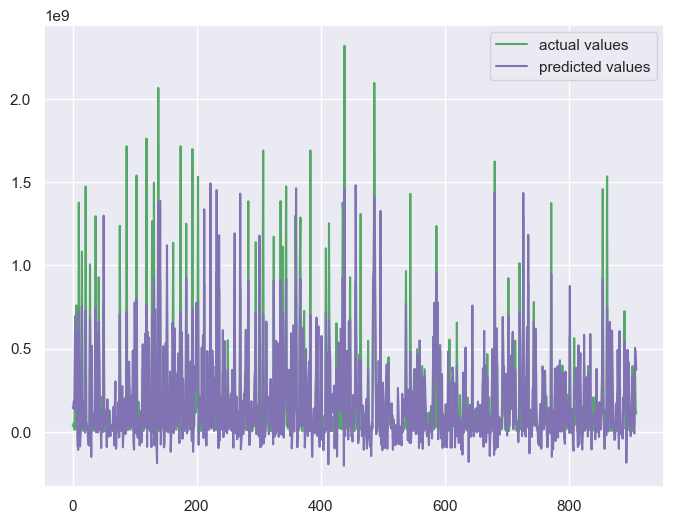

In [139]:
lg = LinearRegression()

lg.fit(X_train,y_train)

lg_pred = lg.predict(X_test)
# applying cross-valiation 
score = cross_val_score(lg,X_train,y_train,cv = 5)

print("Accuracy before cross_validation: ",r2_score(y_test,lg_pred))
print("Accuracy After cross_validation: ", score.mean())
print("Mean Square Error: ", mean_squared_error(y_test,lg_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,lg_pred))


# check difference between actual target values and predicted values by graph
plt.figure(figsize=(8, 6))
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
plt.plot([i for i in range(len(y_test))],lg_pred, c='m',label="predicted values")
plt.legend()
plt.show()

# Sentimental Analysis on hotel reviews

In [285]:
hotel = pd.read_csv('hotel_dataset.csv')

In [286]:
hotel

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [287]:
hotel.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [289]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

hotel.isna().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


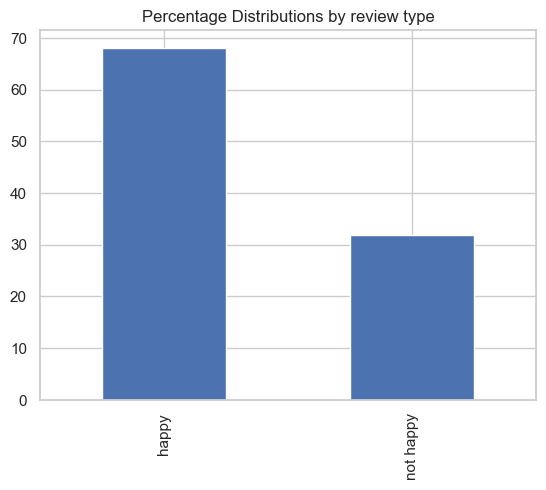

In [291]:
### Checking for the Distribution of Default ###
print('Percentage for default\n')
print(round(hotel['Is_Response'].value_counts(normalize=True)*100,2))
round(hotel['Is_Response'].value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [293]:
#Removing columns
hotel.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [294]:
hotel

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy
...,...,...
38927,We arrived late at night and walked in to a ch...,happy
38928,The only positive impression is location and p...,not happy
38929,Traveling with friends for shopping and a show...,not happy
38930,The experience was just ok. We paid extra for ...,not happy


In [295]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [296]:
# Let's take a look at the updated text
hotel['cleaned_description'] = pd.DataFrame(hotel['Description'].apply(cleaned1))
hotel.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [297]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [298]:
# Let's take a look at the updated text
hotel['complete_cleaned'] = pd.DataFrame(hotel['cleaned_description'].apply(cleaned2))
hotel.head(10)

,Description,Is_Response,cleaned_description,complete_cleaned
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [299]:
X_review = hotel.complete_cleaned
y_review = hotel.Is_Response

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_review, y_review, test_size = 0.2, random_state = 5)


In [306]:
tvec = TfidfVectorizer()
lgf = LogisticRegression()

In [308]:
model = Pipeline([('vectorizer',tvec),('classifier',lgf)])

model.fit(Xr_train, yr_train)


from sklearn.metrics import confusion_matrix

pred = model.predict(Xr_test)

confusion_matrix(pred, yr_test)

array([[4988,  550],
       [ 324, 1925]], dtype=int64)

In [312]:
print("Accuracy : ", metrics.accuracy_score(pred, yr_test))
print("Precision : ", metrics.precision_score(pred, yr_test, average = 'weighted'))
print("Recall : ", metrics.recall_score(pred, yr_test, average = 'weighted'))

Accuracy :  0.8877616540387826
Precision :  0.8924409379309111
Recall :  0.8877616540387826


In [319]:
# Try on different input
example = ["Rooms are very small"]
result = model.predict(example)

print(result)

['not happy']
